## Main Goal
We are building and comparing various time series and machine learning models to predict Bitcoin prices, aiming to identify the most accurate methods for forecasting future cryptocurrency trends.

### Data Understanding
The dataset has one csv file for each currency. Price history is available on a daily basis from April 28, 2013.  
This dataset has the historical price information of some of the top crypto currencies by market capitalization.

1. **Date** : date of observation
2. **Open** : Opening price on the given day
3. **High** : Highest price on the given day
4. **Low** : Lowest price on the given day
5. **Close** : Closing price on the given day
6. **Volume** : Volume of transactions on the given day
7. **Market Cap** : Market capitalization in USD

The dataset is downloaded from: [https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?resource=download]

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
dataset = pd.read_csv("datasets/bitcoins/coin_Bitcoin.csv")

In [75]:
dataset.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [76]:
dataset.shape

(2991, 10)

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [78]:
dataset.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [79]:
dataset.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

### Exploratory Data Analysis
#### What is the overall trend of Bitcoin's closing price over the entire time period?

In [80]:
# Converting the 'date' format 
dataset['Date'] = pd.to_datetime(dataset['Date'])
# Sort dataset by date
dataset = dataset.sort_values('Date')

In [81]:
dataset['Year'] = dataset['Date'].dt.year

In [82]:
# Grouping by Year and getting the average closing price.
yearly_trend = dataset.groupby('Year')['Close'].mean()

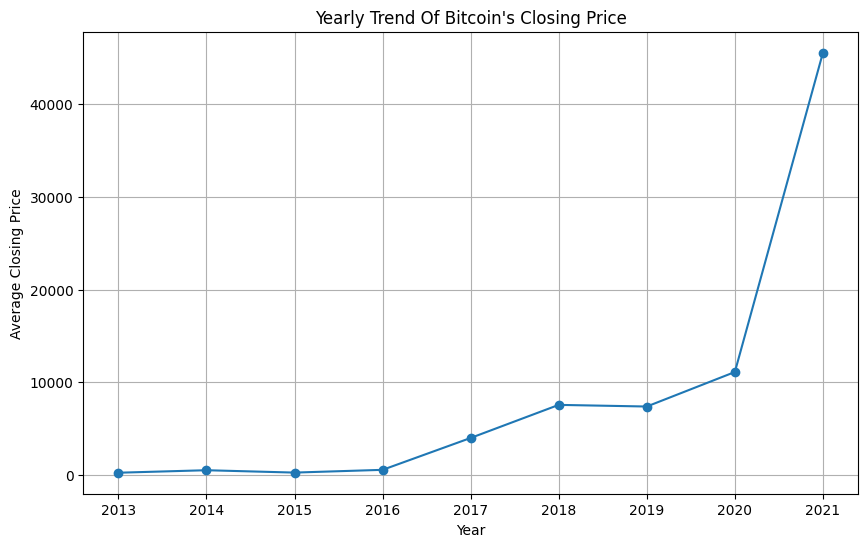

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.title("Yearly Trend Of Bitcoin's Closing Price")
plt.grid(True)
plt.show()

> The analysis of Bitcoin's average closing price reveals a remarkable upward trend. From 2013 to 2016, the price remained relatively low, almost negligible. In 2017, Bitcoin experienced a significant surge, with the average closing price reaching around $5,000. This upward trajectory continued, and by 2020, the average closing price climbed to approximately $11,000. The trend reached a peak in 2021, with an average closing price skyrocketing to around $45,000. This indicates a dramatic increase in the value of Bitcoin over the observed period.  

#### How has the volatility of Bitcoin's price changed over time?

In [84]:
# Calculate daily returns
dataset['Daily Return'] = dataset['Close'].pct_change()

# Calculate rolling standard deviation (volatility) over a 30-day window (can be adjusted)
dataset['30-Day Volatility'] = dataset['Daily Return'].rolling(window=30).std() * (30**0.5)

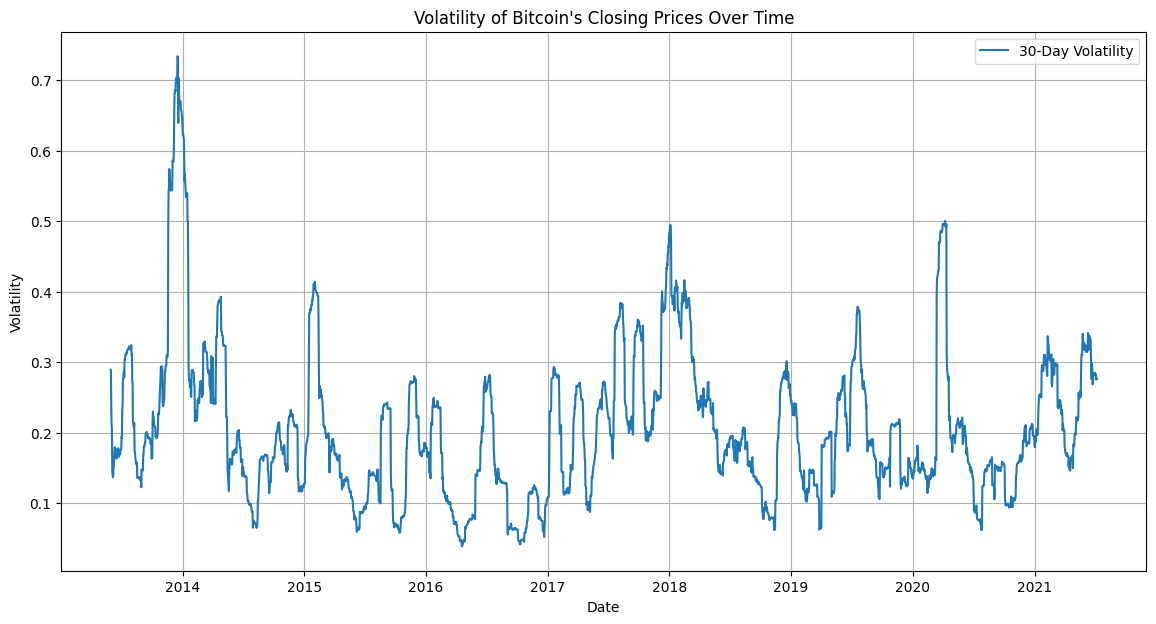

In [85]:
# Plot the rolling 30-day volatility
plt.figure(figsize=(14, 7))
plt.plot(dataset['Date'], dataset['30-Day Volatility'], label='30-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title("Volatility of Bitcoin's Closing Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

> The observed pattern of high volatility at the beginning of each year, particularly in the December-January-February period, suggests that there are specific factors or events driving significant price fluctuations during these times. Here are some possible interpretations:   

> Market Sentiment and Speculation : The end of the year often brings market evaluations, profit-taking, and tax considerations, which could contribute to increased trading activity and volatility.  
> Regulatory Announcements: The start of a new year may coincide with new regulatory announcements or changes in different countries, impacting market behavior.  
> Major News Events: Key developments, partnerships, technological advancements, or security breaches often occur around the beginning of the year.  
> Market Cycles: The cryptocurrency market tends to follow cyclical patterns, and the observed volatility could be part of these cycles.  

#### What is the relationship between the opening, closing, high, and low prices?

In [86]:
# Calculate the correlation matrix
correlation_matrix = dataset[['Open', 'Close', 'High', 'Low']].corr()

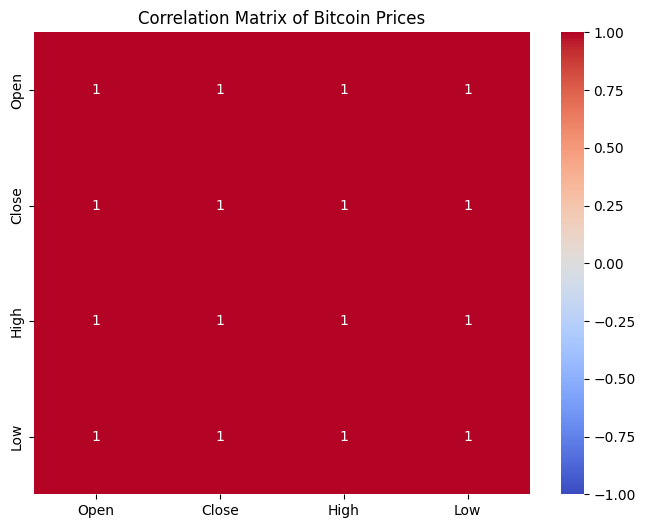

In [87]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Bitcoin Prices')
plt.show()

> The high correlation values (around 0.98 or 0.99) between the different prices ('Open', 'Close', 'High', and 'Low') indicate that these prices move very closely together. This means that when one price changes, the others tend to change in a similar way.  
> This information can be helpful in:  
> 1. Predictive analysis: Knowing that these prices are highly correlated allows you to use one price to predict the behavior of the others.  
> 2. Simplified Modeling: In financial modeling or trading algorithms, you might not need to consider all four prices separately, as they provide similar information.  
> 3. Risk Management: For traders and investors, understanding the correlation helps in managing risk.

#### Is there a correlation between trading volume and price movements?

In [88]:
# Calculate the correlation between trading volume and daily returns
vol_daily_corr = dataset[['Volume', 'Daily Return']].corr()
print(f"Correlation between Trading Volume and Price Movement (Daily Return): ", vol_daily_corr.iloc[0, 1])

Correlation between Trading Volume and Price Movement (Daily Return):  0.004034050741780885


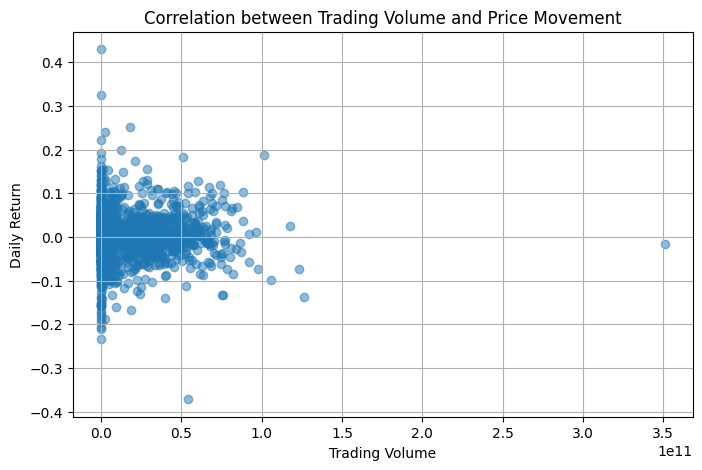

In [89]:
# Plot the relationship between trading volume and daily returns
plt.figure(figsize=(8, 5))
plt.scatter(dataset['Volume'], dataset['Daily Return'], alpha=0.5)
plt.xlabel('Trading Volume')
plt.ylabel('Daily Return')
plt.title('Correlation between Trading Volume and Price Movement')
plt.grid(True)
plt.show()

> The near-zero correlation between trading volume and price movement (daily return) indicates that there is no significant linear relationship between the two.  
This suggests that changes in trading volume do not strongly affect the daily returns of Bitcoin's price.  

#### How has the market capitalization evolved over time, and how is it related to price and volume?

In [90]:
# Group by 'Year' and calculate the mean for 'marketcap', 'close' price, and 'volume'
yearly_trends = dataset.groupby('Year')[['Marketcap', 'Close', 'Volume']].mean().reset_index()

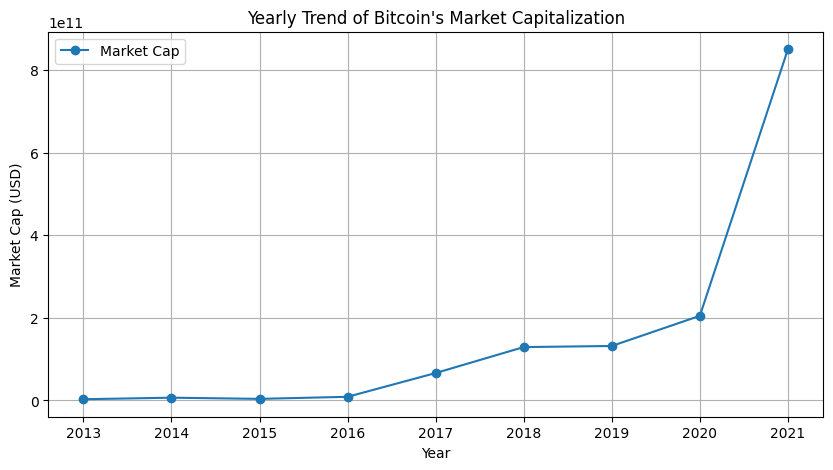

In [91]:
# Plot the yearly trend of market capitalization
plt.figure(figsize=(10, 5))
plt.plot(yearly_trends['Year'], yearly_trends['Marketcap'], marker='o', linestyle='-', label='Market Cap')
plt.xlabel('Year')
plt.ylabel('Market Cap (USD)')
plt.title("Yearly Trend of Bitcoin's Market Capitalization")
plt.legend()
plt.grid(True)
plt.show()

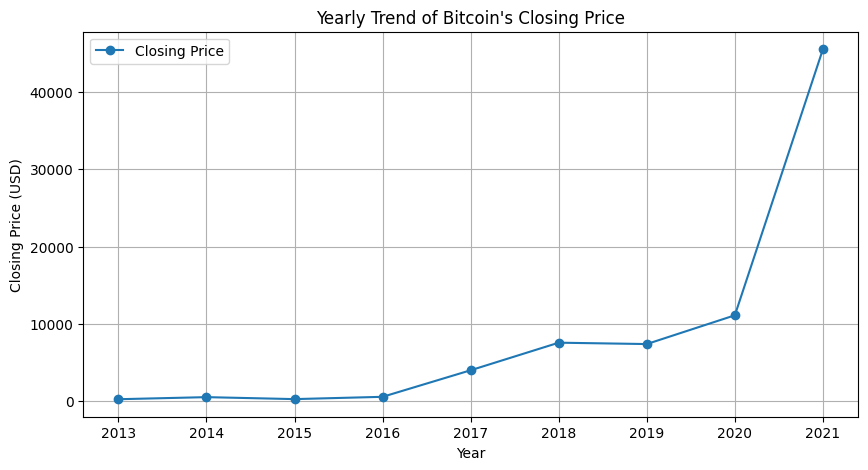

In [92]:
# Plot the yearly trend of closing price
plt.figure(figsize=(10, 5))
plt.plot(yearly_trends['Year'], yearly_trends['Close'], marker='o', linestyle='-', label='Closing Price')
plt.xlabel('Year')
plt.ylabel('Closing Price (USD)')
plt.title("Yearly Trend of Bitcoin's Closing Price")
plt.legend()
plt.grid(True)
plt.show()

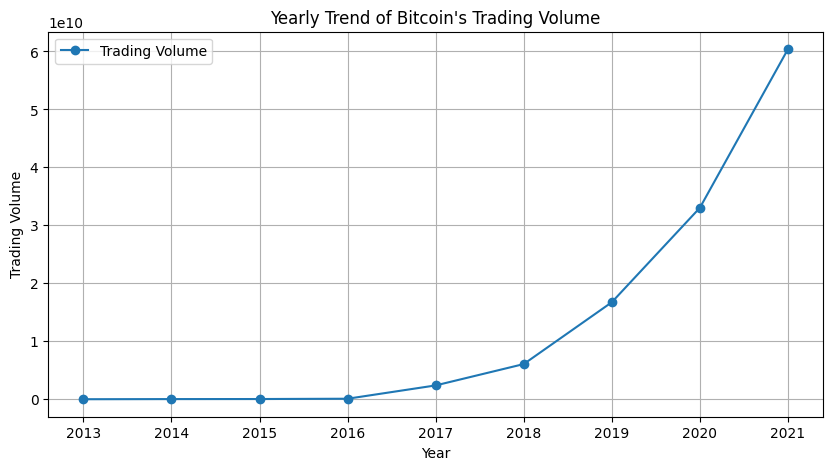

In [93]:
# Plot the yearly trend of trading volume
plt.figure(figsize=(10, 5))
plt.plot(yearly_trends['Year'], yearly_trends['Volume'], marker='o', linestyle='-', label='Trading Volume')
plt.xlabel('Year')
plt.ylabel('Trading Volume')
plt.title("Yearly Trend of Bitcoin's Trading Volume")
plt.legend()
plt.grid(True)
plt.show()

In [94]:
# Calculate the correlation between market capitalization, closing price, and trading volume
correlation_matrix = yearly_trends[['Marketcap', 'Close', 'Volume']].corr()

# Display the correlation matrix
print(correlation_matrix)

           Marketcap     Close    Volume
Marketcap   1.000000  0.999898  0.945732
Close       0.999898  1.000000  0.944769
Volume      0.945732  0.944769  1.000000


> The near-perfect correlation (0.999898) between the closing price and market capitalization indicates that changes in the closing price directly impact the market capitalization.  
The strong correlation (0.945732) between trading volume and market capitalization suggests that higher trading volumes are associated with higher market capitalization. This implies that increased trading activity is often accompanied by rising prices and, consequently, a higher market capitalization.  
The graphs visually confirm the strong relationships between Bitcoin's market capitalization, closing price, and trading volume.  

#### Are there any outliers or anomalies in the data that need to be addressed?

In [144]:
dataset.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap', 'Year', 'Daily Return', '30-Day Volatility',
       'Month', 'Day', 'Close_log', 'Open_log', 'High_log', 'Low_log',
       'Marketcap_log'],
      dtype='object')

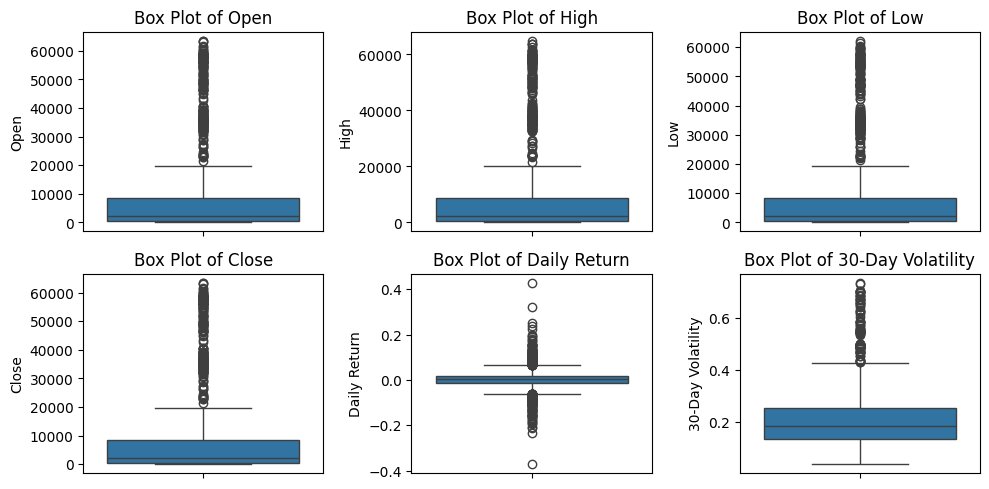

In [ ]:
# Visual Inspection using Box Plots
numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']
plt.figure(figsize=(10, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=dataset[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

> All of the numerical features of the dataset contain outliers which we leave them for now, and deal with them in data preprocessing step!  

### Data Preprocessing

In [96]:
dataset.head(2)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Year,Daily Return,30-Day Volatility
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444,144.539993,0.0,1.603769e+09,2013,NaN,NaN
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000,139.000000,0.0,1.542813e+09,2013,-0.038328,NaN


In [97]:
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

#### Dealing With Outliers
> Outliers can skew the data, making it challenging for models to learn effectively. A common technique to mitigate this is applying **a logarithmic transformation**, which compresses the scale of large values!  

> However, Random Forest is robust to outliers, so they may not significantly affect the model.

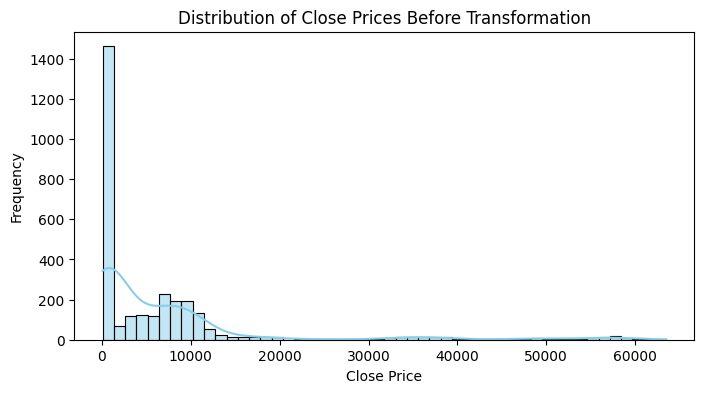

In [98]:
# Histogram of the original 'Close' price
plt.figure(figsize=(8, 4))
sns.histplot(dataset['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Close Prices Before Transformation')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

In [99]:
# Apply log transformation to 'Close' price
dataset['Close_log'] = np.log1p(dataset['Close'])  # Using log1p for log(1 + x) to handle zero values
dataset['Open_log'] = np.log1p(dataset['Open'])
dataset['High_log'] = np.log1p(dataset['High'])
dataset['Low_log'] = np.log1p(dataset['Low'])
dataset['Marketcap_log'] = np.log1p(dataset['Marketcap'])

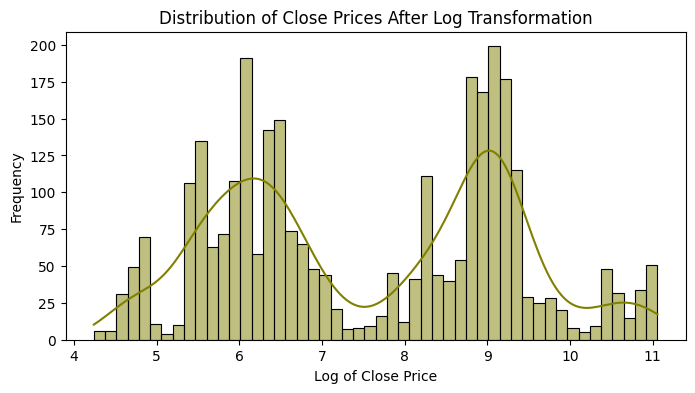

In [100]:
# Visualize the transformed 'Close' price
plt.figure(figsize=(8, 4))
sns.histplot(dataset['Close_log'], bins=50, kde=True, color='olive')
plt.title('Distribution of Close Prices After Log Transformation')
plt.xlabel('Log of Close Price')
plt.ylabel('Frequency')
plt.show()


#### Dealing with Bitcoins with ZERO volumes
**Volume** : Volume of transactions on the given day

In [101]:
# Filter out rows where 'Volume' is zero
new_dataset = dataset[dataset['Volume'] != 0].copy()

In [102]:
new_dataset['Volume_log'] = np.log1p(dataset['Volume'])

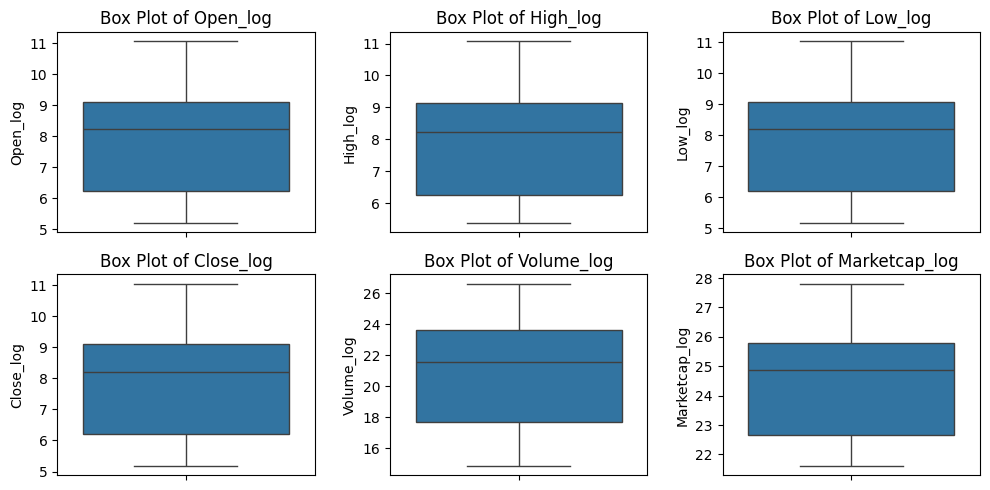

In [103]:
# Visual Inspection using Box Plots
numerical_features = ['Open_log', 'High_log', 'Low_log', 'Close_log', 'Volume_log', 'Marketcap_log']
plt.figure(figsize=(10, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=new_dataset[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

### Model Building Random Forest

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
y = new_dataset['Close_log']  # Use the log-transformed 'Close' price
X = new_dataset[['Open_log', 'High_log', 'Low_log', 'Marketcap_log']] # After performing Feature Importance and based on insights from EDA

In [149]:
# Determine the split index (e.g., 80% training, 20% testing)
split_index = int(len(new_dataset) * 0.8)

# Split the features and target variables
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [150]:
# Initialize the model with default parameters!
rf_model = RandomForestRegressor(random_state=42)

In [151]:
# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [152]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='neg_mean_squared_error')

In [153]:
# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator
best_rf_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


#### Making Predictions & Evaluating the model

In [154]:
# Make predictions
y_pred = best_rf_model.predict(X_test)

In [155]:
# Since we used log transformation, convert predictions back to the original scale
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

In [156]:
# Evaluate the model
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 9338.47
Root Mean Squared Error (RMSE): 16552.78


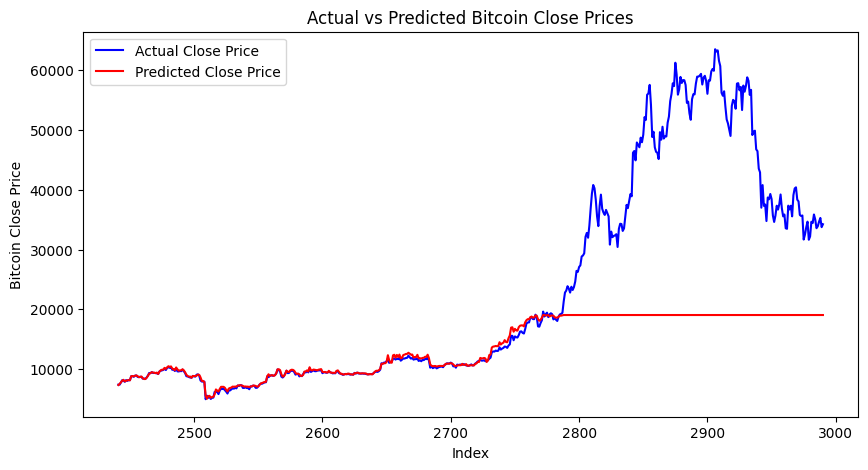

In [159]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_original.index, y_test_original.values, label='Actual Close Price', color='blue')
plt.plot(y_test_original.index, y_pred_original, label='Predicted Close Price', color='red')
plt.xlabel('Index')
plt.ylabel('Bitcoin Close Price')
plt.title('Actual vs Predicted Bitcoin Close Prices')
plt.legend()
plt.show()

> MAE (9330.69) & RMSE (16541.71): These indicate that, on average, your model's predictions are off by around $9,330 (MAE) and $16,541 (RMSE) in the original price scale.

> **Plot Behavior**: The lines are close in the training period, meaning the model fits well on data it has seen. After index 2800—the likely point where test data begins—the actual prices rise sharply while predictions flatten out. This suggests the model didn’t capture the new, upward trend in the test period.  

> The RF model learned patterns present in the training set **but fails to extrapolate to changing dynamics in the test set**.

### Model Building Time Series Model (ARIMA)

**Assumptions of ARIMA**:

1. **Stationarity**: The time series should have a constant mean and variance over time.
2. **No Autocorrelation in Residuals**: After fitting the model, residuals should be uncorrelated (white noise).
3. **Normality of Residuals**: Residuals are ideally normally distributed (important for inference).
4. **Correct Model Specification**: The chosen orders (p, d, q) should appropriately capture the time series dynamics.

In [161]:
from statsmodels.tsa.stattools import adfuller

#### Assumption 1
1. **Null Hypothesis (H₀)**: The series is non-stationary.
2. **Alternative Hypothesis (H₁)**: The series is stationary.
3. A p-value below 0.05 typically indicates stationarity.

In [162]:
result = adfuller(dataset['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.7973098451195632
p-value: 0.8199110033239145


In [163]:
# Calculate rolling statistics (e.g., 30-day window)
rolling_mean = dataset['Close'].rolling(window=30).mean()
rolling_std = dataset['Close'].rolling(window=30).std()

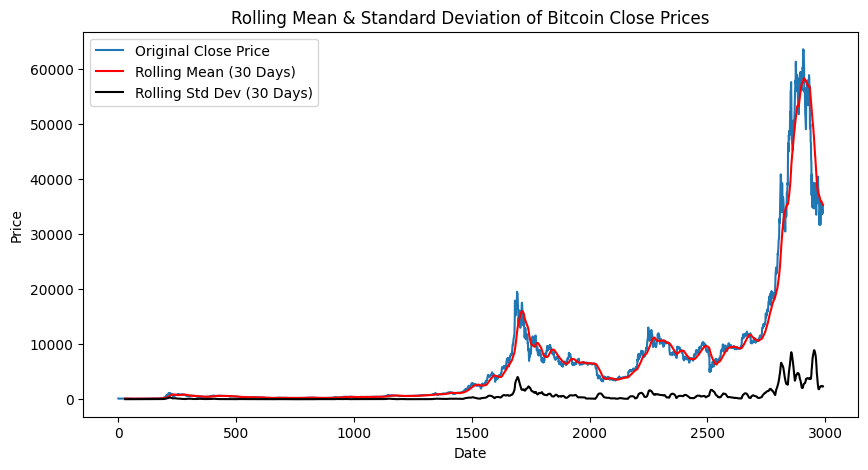

In [165]:
# Plot original series, rolling mean, and rolling standard deviation
plt.figure(figsize=(10, 5))
plt.plot(dataset['Close'], label='Original Close Price')
plt.plot(rolling_mean, color='red', label='Rolling Mean (30 Days)')
plt.plot(rolling_std, color='black', label='Rolling Std Dev (30 Days)')
plt.title('Rolling Mean & Standard Deviation of Bitcoin Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()